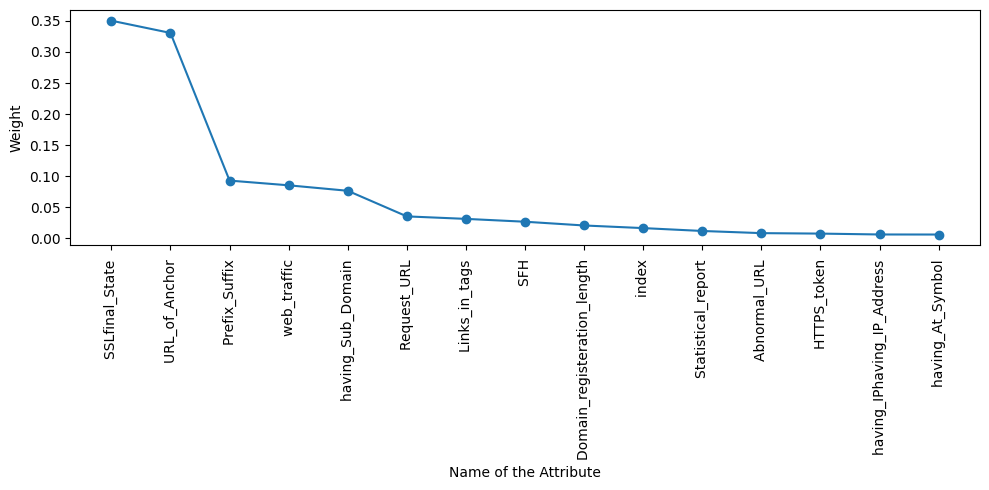

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load your dataset here
dataset = pd.read_csv('PhishingData.csv')

# Define features and target
X = dataset.drop(columns=['Result'])  # Features
y = dataset['Result']  # Target

# Calculate mutual information for each feature
mi_scores = mutual_info_classif(X, y, random_state=0)

# Create a DataFrame with the scores and feature names
mi_scores_df = pd.DataFrame({'Attribute': X.columns, 'Weight': mi_scores})

# Sort the features based on mutual information score
mi_scores_df = mi_scores_df.sort_values(by='Weight', ascending=False)

# Select the top 15 features
top_mi_scores_df = mi_scores_df.head(15)

# Plot the top 15 feature scores
plt.figure(figsize=(10, 5))
plt.plot(top_mi_scores_df['Attribute'], top_mi_scores_df['Weight'], marker='o')
# plt.title('Top 15 Features Importance using Mutual Information')
plt.xlabel('Name of the Attribute')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


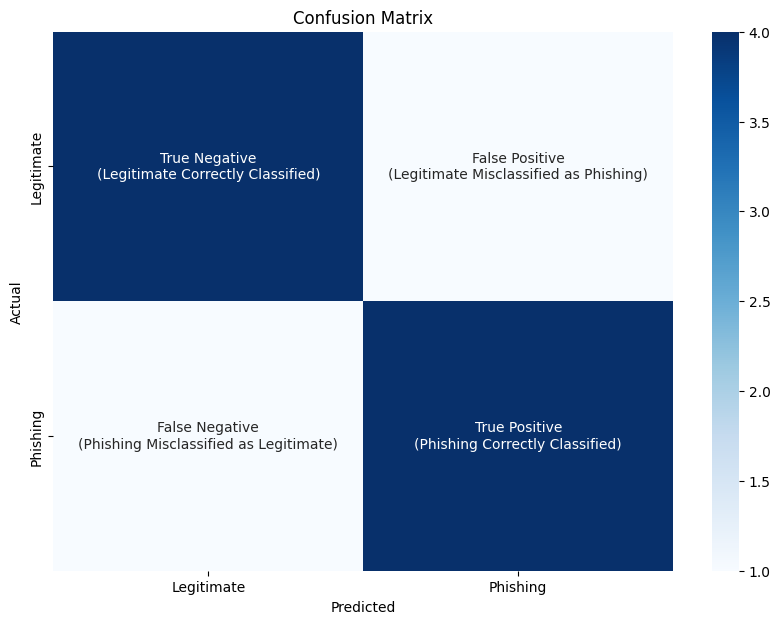

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Replace these with your actual test labels and model predictions
# y_true represents the actual labels, y_pred represents the model predictions
y_true = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]  # Replace with actual test labels
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]  # Replace with model predictions

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Annotate each cell with what they represent
group_names = ['True Negative\n(Legitimate Correctly Classified)',
               'False Positive\n(Legitimate Misclassified as Phishing)',
               'False Negative\n(Phishing Misclassified as Legitimate)',
               'True Positive\n(Phishing Correctly Classified)']
labels = np.asarray(group_names).reshape(2, 2)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import pandas as pd

# Data for accuracies of SVM, RF, XGBoost
accuracy_svm = [0.906871609403255, 0.9276672694394213, 0.9222423146473779, 0.9195298372513563,
                0.918625678119349, 0.9276018099547512, 0.9194570135746606, 0.934841628959276,
                0.9248868778280543, 0.9330316742081448]
accuracy_rf = [0.9122965641952984, 0.9213381555153707, 0.9195298372513563, 0.9222423146473779,
               0.9267631103074141, 0.934841628959276, 0.9176470588235294, 0.9339366515837104,
               0.9194570135746606, 0.9230769230769231]
accuracy_xgb = [0.9656419529837251, 0.976491862567812, 0.972875226039783, 0.9656419529837251,
                0.969258589511754, 0.9683257918552036, 0.9728506787330317, 0.9656108597285068,
                0.9619909502262444, 0.9683257918552036]

# Creating a DataFrame
df = pd.DataFrame({
    'SVM': accuracy_svm,
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb
})

# Save to Excel
df.to_excel('model_accuracies.xlsx', index=False)
